## Heart Disease

### Preprocessing 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("kaggle/input"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'creditcardfraud', 'heart.csv']


In [3]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("kaggle/input/heart.csv")
#df = df.drop('Unnamed: 0', axis=1)
print(df.head())
print(df.shape)
print(df.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### Data Visualization 

Text(0.5, 1.0, 'Male (1) vs Female (0) affected by Heart Diseases')

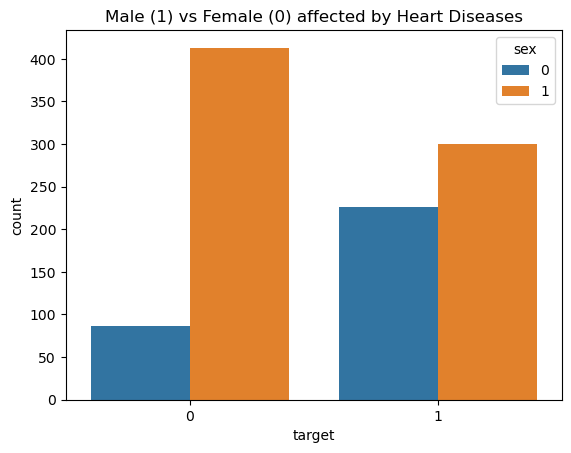

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'target',data = df,hue = 'sex')
plt.title("Male (1) vs Female (0) affected by Heart Diseases")

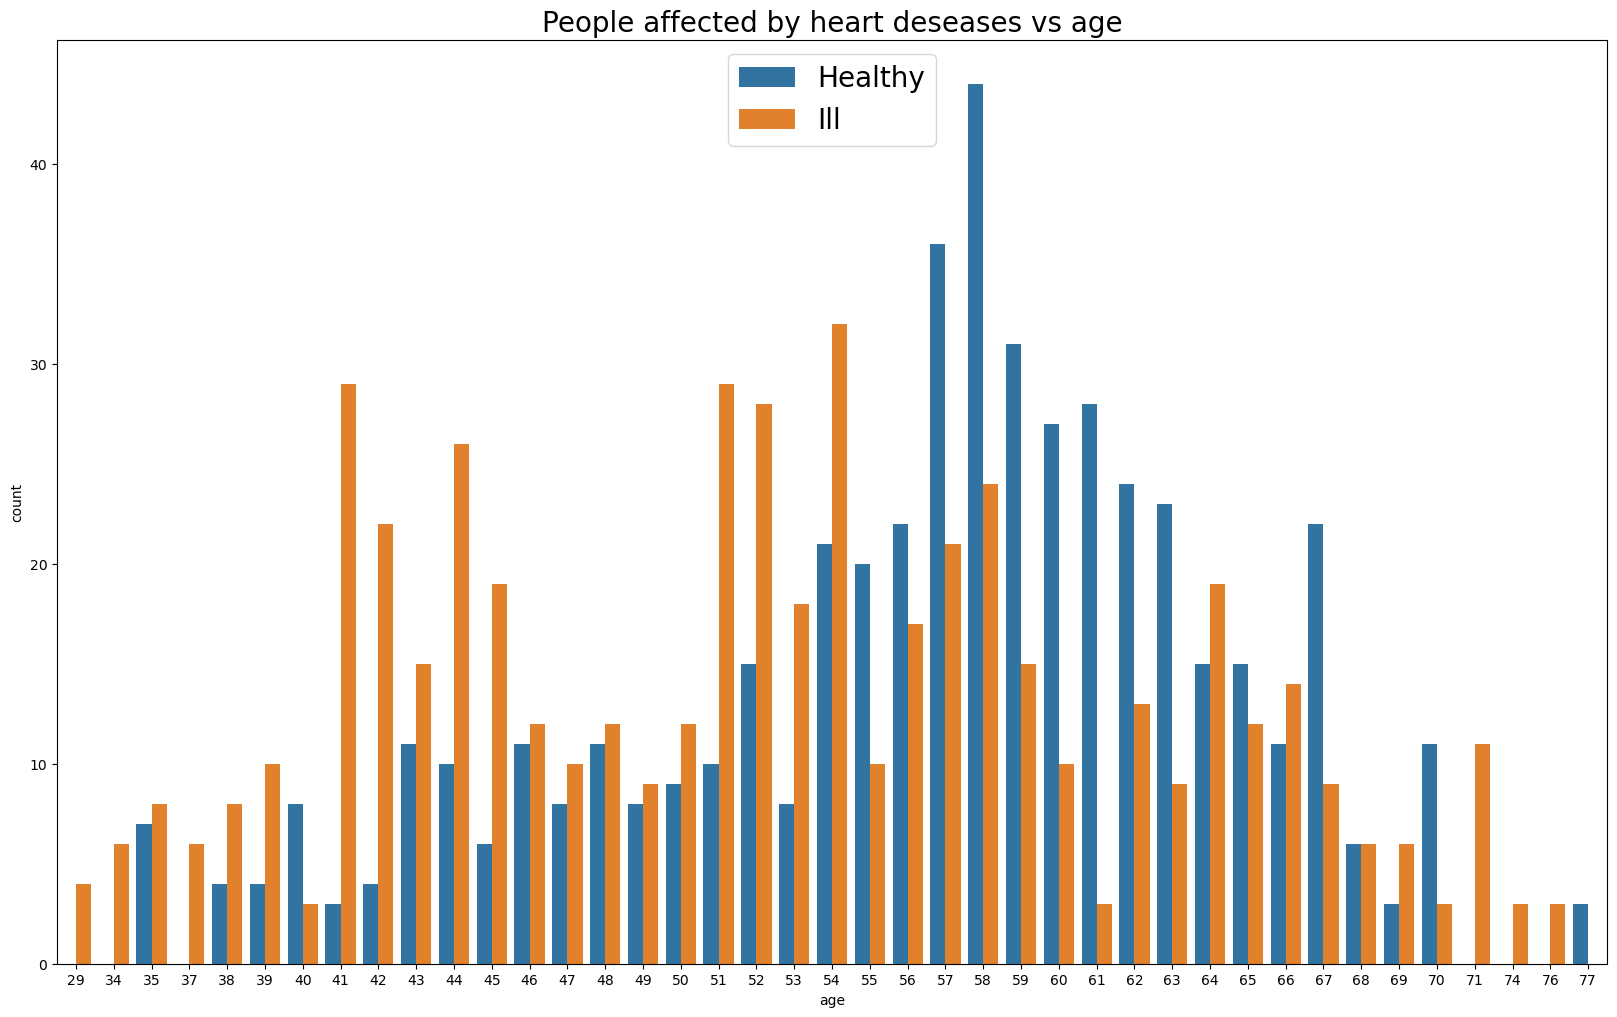

In [5]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'age',hue = 'target',data = df)
plt.title("People affected by heart deseases vs age", fontsize=20)
plt.legend(["Healthy","Ill"], fontsize=20)

Text(0.5, 1.0, 'Heart rate vs Age')

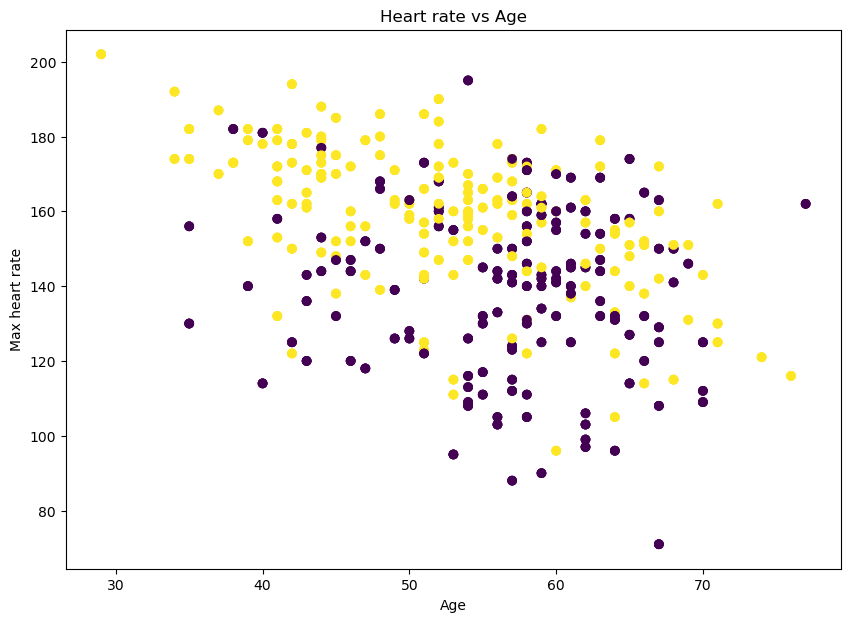

In [6]:
plt.figure(figsize = (10,7))
plt.scatter(x = 'age',y = 'thalach', c='target',data = df)
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.title('Heart rate vs Age')

<AxesSubplot:>

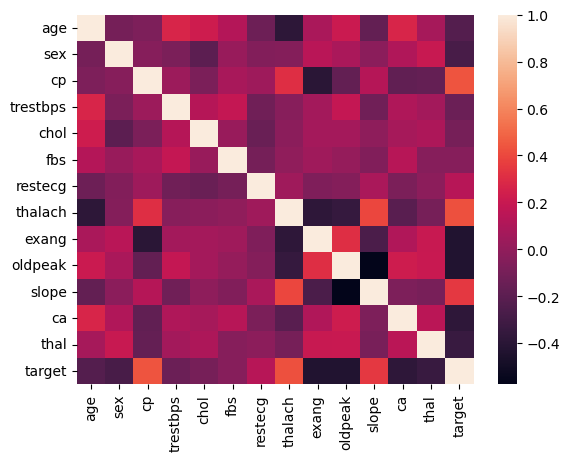

In [7]:
import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Machine Learning 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1).values
Y = df['target']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [9]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Logistic Regression

In [10]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[110  38]
 [ 14 146]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       148
           1       0.79      0.91      0.85       160

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308



Random Forest

In [11]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[148   0]
 [  0 160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       160

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



Support Vector Machines

In [12]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[106  42]
 [ 12 148]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       148
           1       0.78      0.93      0.85       160

    accuracy                           0.82       308
   macro avg       0.84      0.82      0.82       308
weighted avg       0.84      0.82      0.82       308



Decision Tree

In [13]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

[[148   0]
 [ 13 147]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       148
           1       1.00      0.92      0.96       160

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



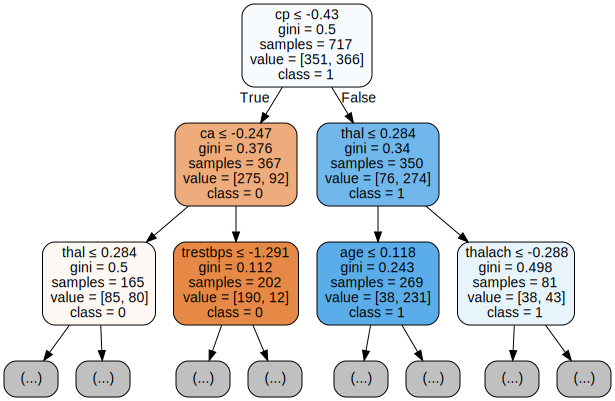

In [14]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names=df.drop(['target'], axis = 1).columns,
                       class_names=['0', '1'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

Linear Discriminant Anaylsis

In [15]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

[[104  44]
 [ 12 148]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       148
           1       0.77      0.93      0.84       160

    accuracy                           0.82       308
   macro avg       0.83      0.81      0.81       308
weighted avg       0.83      0.82      0.82       308



Naive Bayes

In [16]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

[[113  35]
 [ 17 143]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       148
           1       0.80      0.89      0.85       160

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308



XGBoost

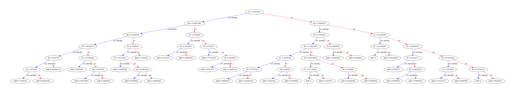

<Figure size 5000x5500 with 0 Axes>

In [20]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(X_Train, Y_Train)

plot_tree(model)
plt.figure(figsize = (50,55))
plt.show()

[[148   0]
 [  0 160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       160

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



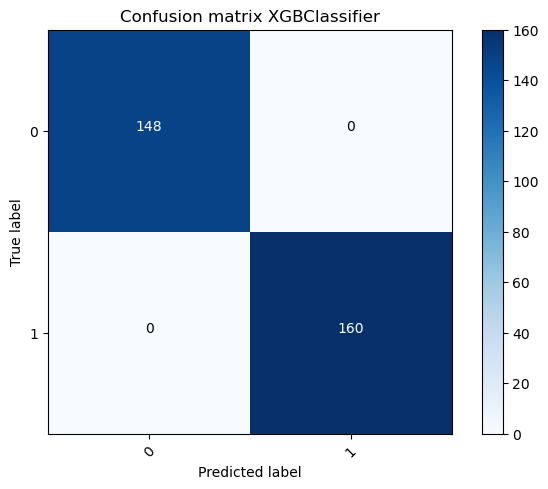

In [21]:
from itertools import product
import itertools

predictions =model.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

# Thanks to: https://www.kaggle.com/tejainece/data-visualization-and-machine-learning-algorithms
def plot_confusion_matrix(cm, classes=["0", "1"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ' +title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot = confusion_matrix(Y_Test,predictions)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'XGBClassifier')

### Feature Engineering 

Principal Component Analysis

In [22]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

# pca = PCA(n_components=2,svd_solver='full')
# X_reduced = pca.fit_transform(X_Train)
#X_reduced = TSNE(n_components=2).fit_transform(X_Train, Y_Train)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)

# pca = PCA(n_components=2,svd_solver='full')
# X_test_reduced = pca.fit_transform(X_Test)
#X_test_reduced = TSNE(n_components=2).fit_transform(X_Test, Y_Test)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

Naive Bayes
[[106  42]
 [ 20 140]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       148
           1       0.77      0.88      0.82       160

    accuracy                           0.80       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.80      0.80      0.80       308

SVM
[[110  38]
 [ 25 135]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       148
           1       0.78      0.84      0.81       160

    accuracy                           0.80       308
   macro avg       0.80      0.79      0.79       308
weighted avg       0.80      0.80      0.79       308

Random Forest
[[148   0]
 [  0 160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       160

    accuracy                           1.00       308
   macro avg       1.00      

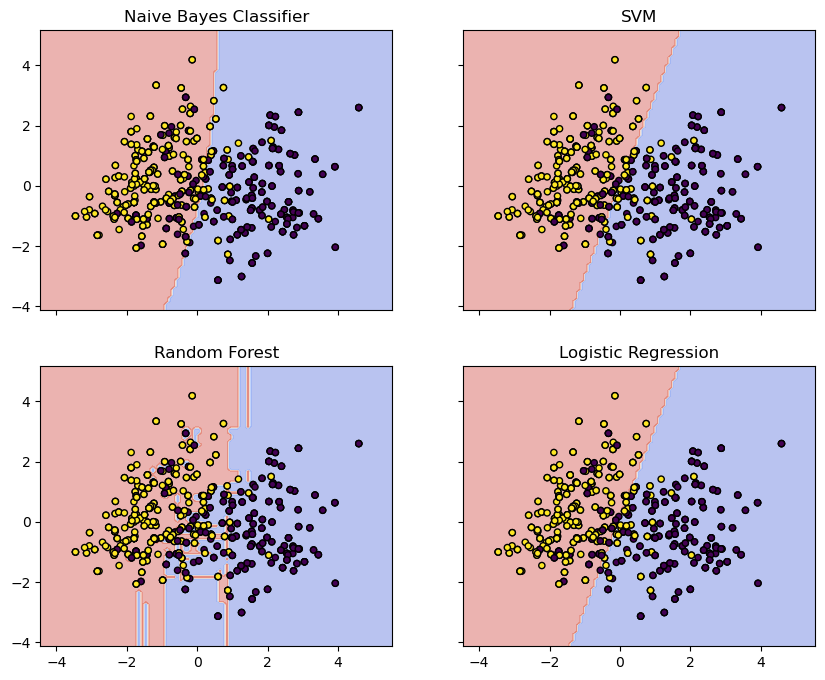

In [23]:
reduced_data = X_reduced

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)

# Thanks to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

t-SNE

In [26]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1025 samples in 0.006s...
[t-SNE] Computed neighbors for 1025 samples in 0.084s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1025
[t-SNE] Computed conditional probabilities for sample 1025 / 1025
[t-SNE] Mean sigma: 1.615669
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.463112
[t-SNE] KL divergence after 300 iterations: 0.807872
t-SNE done! Time elapsed: 3.1504967212677 seconds


<AxesSubplot:>

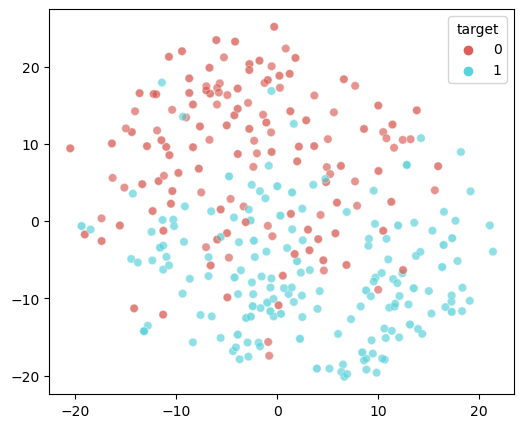

In [27]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=Y,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

### Clustering 

In [28]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

# print('Original number of features:', X.shape[1])
# print('Reduced number of features:', X_lda.shape[1])
print(pca.explained_variance_ratio_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

[0.21369912 0.11971959]


K-Means Clustering

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_reduced)

In [30]:
kpredictions = kmeans.predict(X_test_reduced)
print(confusion_matrix(Y_Test,kpredictions))
print(classification_report(Y_Test,kpredictions))

[[ 57  91]
 [148  12]]
              precision    recall  f1-score   support

           0       0.28      0.39      0.32       148
           1       0.12      0.07      0.09       160

    accuracy                           0.22       308
   macro avg       0.20      0.23      0.21       308
weighted avg       0.19      0.22      0.20       308



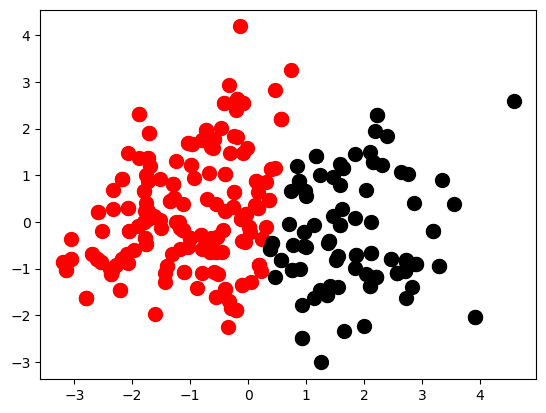

In [31]:
plt.scatter(X_test_reduced[kpredictions ==0,0], X_test_reduced[kpredictions == 0,1], s=100, c='red')
plt.scatter(X_test_reduced[kpredictions ==1,0], X_test_reduced[kpredictions == 1,1], s=100, c='black')

Hierarchical Clustering

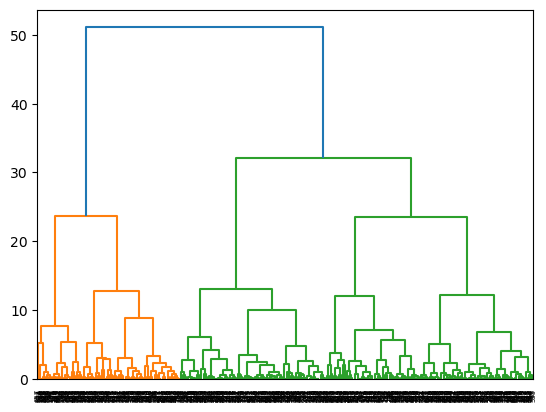

In [32]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
hierarchicalpredictions = hc.fit_predict(X_test_reduced)

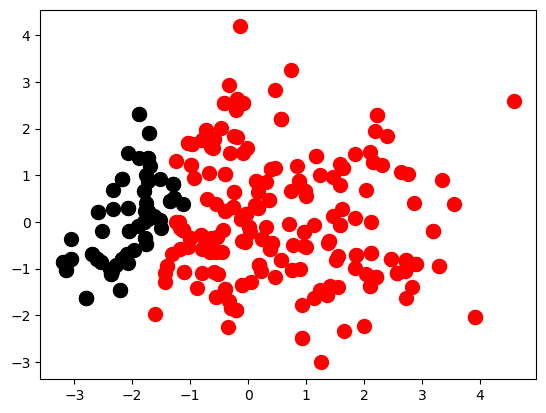

In [33]:
plt.scatter(X_test_reduced[hierarchicalpredictions ==0,0], X_test_reduced[hierarchicalpredictions == 0,1], s=100, c='red')
plt.scatter(X_test_reduced[hierarchicalpredictions ==1,0], X_test_reduced[hierarchicalpredictions == 1,1], s=100, c='black')